# Лабораторная работа № 2. Регрессия

In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Zver\Desktop\ML\data\moldova_cars_task_filtered_ohe.csv', sep=',', encoding='utf-8')
data

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Make_ARO,Make_Abarth,Make_Acura,Make_Alfa Romeo,Make_Alta marca,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
0,2011,195000,1800,1,7750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2014,135000,1500,0,8550,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,2012,110000,1500,0,6550,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,2006,200000,1600,0,4100,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2000,300000,2200,0,3490,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28553,2002,225000,1800,0,4400,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28554,2015,89000,1500,0,7000,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
28555,2009,225,1500,0,4500,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28556,2006,370000,2000,0,4000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Простая линейная регрессия

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
X = data[["Year"]]
y = data["Price(euro)"]

In [4]:
# Разделение данных на тренировочную и тестовую выборки
X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
# Стандартизация
scaler = StandardScaler()
X_simple_train = scaler.fit_transform(X_simple_train)
X_simple_test = scaler.transform(X_simple_test)

In [6]:
# Обучение модели
lr_simple = LinearRegression()
lr_simple.fit(X_simple_train, y_simple_train)

# Предсказание
y_pred_simple = lr_simple.predict(X_simple_test)
y_pred_simple

array([13218.19024284, 12454.97641578,  8638.90728047, ...,
       18560.68703226,  5586.05197223,  4822.83814517])

In [7]:
lr_simple.coef_

array([4495.05631235])

In [8]:
lr_simple.intercept_

np.float64(11048.846975400471)

### Метрики качества

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from math import sqrt
print(f'MAE: {mean_absolute_error(y_simple_test, y_pred_simple)}')
print(f'MSE: {mean_squared_error(y_simple_test, y_pred_simple)}')
print(f'RMSE: {sqrt(mean_squared_error(y_simple_test, y_pred_simple))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_simple_test, y_pred_simple))}')
print(f'R²: {lr_simple.score(X_simple_test, y_simple_test)}')

MAE: 5408.762441990975
MSE: 74456799.65440889
RMSE: 8628.835359097362
MAPE: 0.777919989456968
R²: 0.22556193482999332


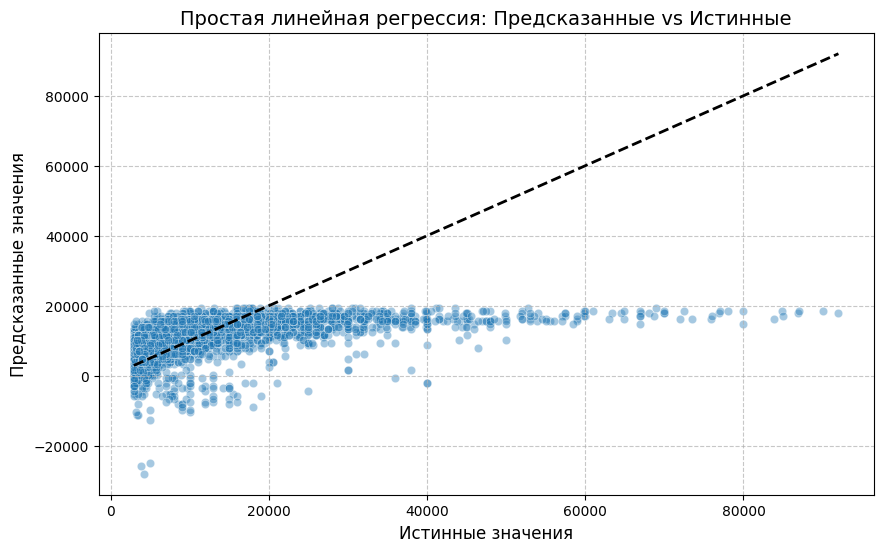

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_simple_test, y=y_pred_simple, alpha=0.4)

# Линия идеального предсказания (y = x)
plt.plot([y_simple_test.min(), y_simple_test.max()], 
         [y_simple_test.min(), y_simple_test.max()], 
         'k--', 
         linewidth=2)

plt.xlabel('Истинные значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Простая линейная регрессия: Предсказанные vs Истинные', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Регуляризация Lasso (L1) + подбор гиперпараметра alfa

In [11]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform

In [12]:
import optuna

C:\Users\Zver\Desktop\machine_learning\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# Функция для оптимизации гиперпараметров
def objective(trial):
    # Определяем гиперпараметры
    alpha = trial.suggest_float('alpha', 1e-5, 1e2, log=True)
    model = Lasso(alpha=alpha)

    # Обучаем модель
    model.fit(X_simple_train, y_simple_train)

    # Предсказываем
    y_pred = model.predict(X_simple_test)

    # Вычисляем ошибку
    mse = mean_squared_error(y_simple_test, y_pred)
    return mse  # Возвращаем MSE для минимизации

In [14]:
# Настраиваем оптимизацию гиперпараметров
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Выводим лучшие гиперпараметры
best_params = study.best_params
lasso_best_modelLRS = Lasso(alpha=best_params['alpha'])
lasso_best_modelLRS.fit(X_simple_train, y_simple_train)

y_pred = lasso_best_modelLRS.predict(X_simple_test)

[I 2025-04-27 17:12:04,587] A new study created in memory with name: no-name-a9245fde-a567-45a1-ac7e-6f998f22513c
[I 2025-04-27 17:12:04,609] Trial 0 finished with value: 74456808.66626811 and parameters: {'alpha': 0.04553745779243003}. Best is trial 0 with value: 74456808.66626811.
[I 2025-04-27 17:12:04,615] Trial 1 finished with value: 74456986.80851772 and parameters: {'alpha': 0.9413105899743444}. Best is trial 0 with value: 74456808.66626811.
[I 2025-04-27 17:12:04,617] Trial 3 finished with value: 74456799.67053793 and parameters: {'alpha': 8.152031619833475e-05}. Best is trial 3 with value: 74456799.67053793.
[I 2025-04-27 17:12:04,617] Trial 2 finished with value: 74456799.65795368 and parameters: {'alpha': 1.7916391264330687e-05}. Best is trial 2 with value: 74456799.65795368.
[I 2025-04-27 17:12:04,620] Trial 4 finished with value: 74460125.38942316 and parameters: {'alpha': 15.549878052033765}. Best is trial 2 with value: 74456799.65795368.
[I 2025-04-27 17:12:04,628] Trial

In [15]:
# Создаем модель Lasso
lasso_model = Lasso(max_iter=1000, tol=0.01)

In [16]:
# Задаем сетку параметров для перебора
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Инициализируем GridSearch
lasso_grid_searchLRS = GridSearchCV(lasso_model, 
                          param_grid, 
                          scoring='neg_mean_squared_error', 
                          cv=3, 
                          verbose=1,
                          n_jobs=-1)
# Обучаем модель с перебором параметров
lasso_grid_searchLRS.fit(X_simple_train, y_simple_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=Lasso(tol=0.01), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [17]:
# RandomizedSearchCV для L1 регуляризации
# Задаем распределение параметров
param_dist = {'alpha': loguniform(1e-3, 100)}

# Инициализируем RandomizedSearch
lasso_random_searchLRS = RandomizedSearchCV(lasso_model, 
                                  param_dist, 
                                  n_iter=20, 
                                  cv=3, 
                                  scoring='neg_mean_squared_error', 
                                  random_state=42, 
                                  verbose=1,
                                  n_jobs=-1)

# Обучаем модель
lasso_random_searchLRS.fit(X_simple_train, y_simple_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=Lasso(tol=0.01), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C0EC61C760>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

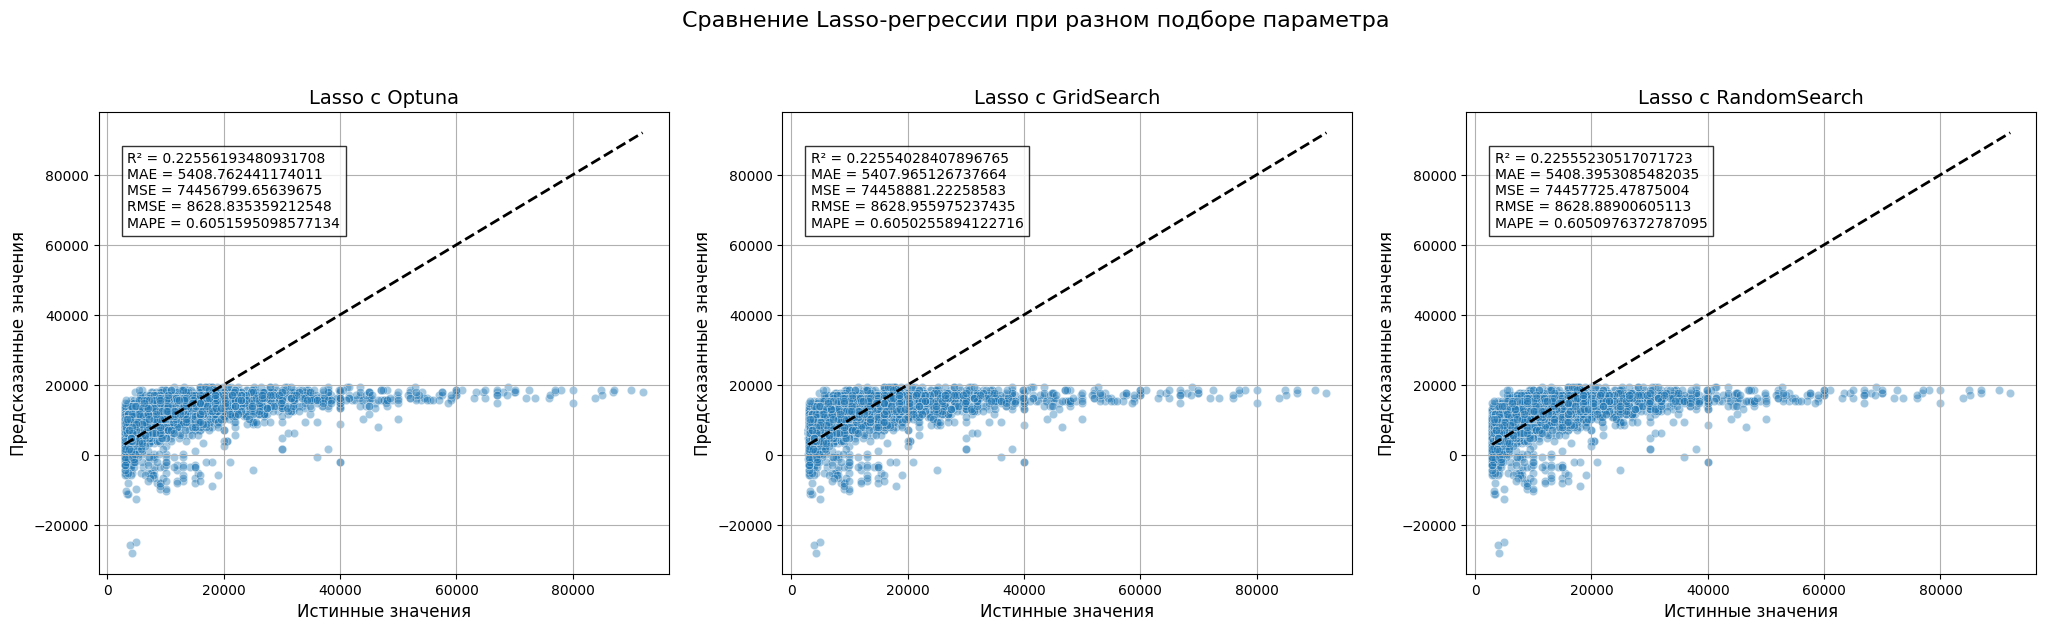

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
plt.suptitle("Сравнение Lasso-регрессии при разном подборе параметра", y=1.05, fontsize=16)

models = [
    (lasso_best_modelLRS, "Lasso с Optuna"),
    (lasso_grid_searchLRS.best_estimator_, "Lasso с GridSearch"),
    (lasso_random_searchLRS.best_estimator_, "Lasso с RandomSearch")
]

for ax, (model, title) in zip(axes, models):

    y_pred = model.predict(X_simple_test)
    
    r2 = r2_score(y_simple_test, y_pred)
    mae = mean_absolute_error(y_simple_test, y_pred)
    mse = mean_squared_error(y_simple_test, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_simple_test, y_pred)
    
    # Scatter plot
    sns.scatterplot(x=y_simple_test, y=y_pred, alpha=0.4, ax=ax)
    ax.plot([y_simple_test.min(), y_simple_test.max()], 
            [y_simple_test.min(), y_simple_test.max()], 
            'k--', 
            lw=2)
    
    stats_text = (f'R² = {r2}\n'
                  f'MAE = {mae}\n'
                  f'MSE = {mse}\n'
                  f'RMSE = {rmse}\n'
                  f'MAPE = {mape}')
    
    ax.text(0.05, 0.75, stats_text, 
            transform=ax.transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Истинные значения', fontsize=12)
    ax.set_ylabel('Предсказанные значения', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True)

plt.show()

### Регуляризация Ridge (L2) + подбор гиперпараметра alfa

L1 регуляризация штрафует за сумму абсолютных значений весов, а L2 регуляризация - за сумму квадратов весов

In [19]:
# Функция для оптимизации гиперпараметров
def objective(trial):
    # Определяем гиперпараметры
    alpha = trial.suggest_float('alpha', 1e-5, 1e2, log=True)
    model = Ridge(alpha=alpha)

    # Обучаем модель
    model.fit(X_simple_train, y_simple_train)

    # Предсказываем
    y_pred = model.predict(X_simple_test)

    # Вычисляем ошибку
    mse = mean_squared_error(y_simple_test, y_pred)
    return mse  # Возвращаем MSE для минимизации

In [20]:
# Настраиваем оптимизацию гиперпараметров
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Выводим лучшие гиперпараметры
best_params = study.best_params
ridge_best_modelLRS = Ridge(alpha=best_params['alpha'])
ridge_best_modelLRS.fit(X_simple_train, y_simple_train)

# Делаем предсказания на тестовом наборе
y_pred = ridge_best_modelLRS.predict(X_simple_test)

[I 2025-04-27 17:12:08,213] A new study created in memory with name: no-name-52e5ec67-5413-4cf1-8c37-79759217ed78
[I 2025-04-27 17:12:08,244] Trial 0 finished with value: 74456800.32877427 and parameters: {'alpha': 0.017322887598254986}. Best is trial 0 with value: 74456800.32877427.
[I 2025-04-27 17:12:08,255] Trial 1 finished with value: 74456804.37691222 and parameters: {'alpha': 0.12129782240589279}. Best is trial 0 with value: 74456800.32877427.
[I 2025-04-27 17:12:08,297] Trial 2 finished with value: 74456799.65484427 and parameters: {'alpha': 1.118420435435434e-05}. Best is trial 2 with value: 74456799.65484427.
[I 2025-04-27 17:12:08,298] Trial 3 finished with value: 74457217.75386544 and parameters: {'alpha': 10.629469760910625}. Best is trial 2 with value: 74456799.65484427.
[I 2025-04-27 17:12:08,311] Trial 4 finished with value: 74456799.65521623 and parameters: {'alpha': 2.0739419541338386e-05}. Best is trial 2 with value: 74456799.65484427.
[I 2025-04-27 17:12:08,326] Tri

In [21]:
# Создаем модель Ridge 
ridge_model = Ridge(max_iter=1000, tol=0.01)

In [22]:
# Параметры для GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

ridge_grid_searchLRS = GridSearchCV(
    ridge_model,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,        
    n_jobs=-1,
    verbose=1
)

ridge_grid_searchLRS.fit(X_simple_train, y_simple_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=Ridge(max_iter=1000, tol=0.01), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

In [23]:
# Параметры для RandomizedSearchCV
param_dist = {'alpha': loguniform(1e-3, 1000)} 
ridge_random_searchLRS = RandomizedSearchCV(
    ridge_model,
    param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

ridge_random_searchLRS.fit(X_simple_train, y_simple_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=Ridge(max_iter=1000, tol=0.01), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C0EC92C580>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

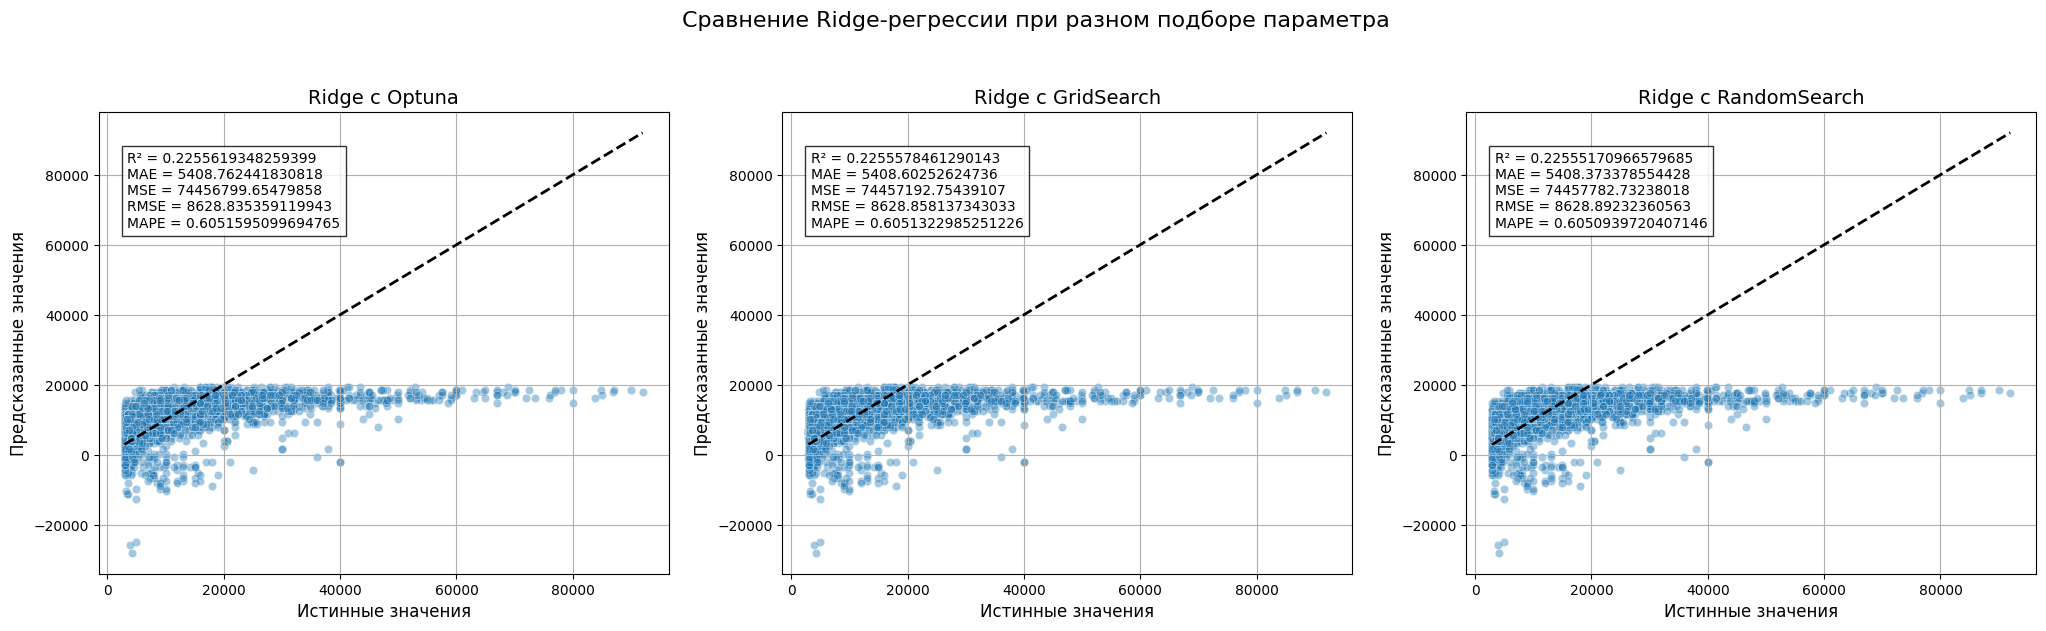

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
plt.suptitle("Сравнение Ridge-регрессии при разном подборе параметра", y=1.05, fontsize=16)

# Список моделей и их названий
models = [
    (ridge_best_modelLRS, "Ridge с Optuna"),
    (ridge_grid_searchLRS.best_estimator_, "Ridge с GridSearch"),
    (ridge_random_searchLRS.best_estimator_, "Ridge с RandomSearch")
]

for ax, (model, title) in zip(axes, models):
    # Получаем предсказания
    y_pred = model.predict(X_simple_test)
    
    r2 = r2_score(y_simple_test, y_pred)
    mae = mean_absolute_error(y_simple_test, y_pred)
    mse = mean_squared_error(y_simple_test, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_simple_test, y_pred)
    
    # Scatter plot
    sns.scatterplot(x=y_simple_test, y=y_pred, alpha=0.4, ax=ax)
    ax.plot([y_simple_test.min(), y_simple_test.max()], 
            [y_simple_test.min(), y_simple_test.max()], 
            'k--', 
            lw=2)
    
    stats_text = (f'R² = {r2}\n'
                  f'MAE = {mae}\n'
                  f'MSE = {mse}\n'
                  f'RMSE = {rmse}\n'
                  f'MAPE = {mape}')
    
    ax.text(0.05, 0.75, stats_text, 
            transform=ax.transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Истинные значения', fontsize=12)
    ax.set_ylabel('Предсказанные значения', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True)

plt.show()

### Регуляризация Elastic Net (L1+L2) + подбор гиперпараметров alfa и l1_ratio

In [25]:
# Функция для оптимизации гиперпараметров
def objective(trial):
    # Определяем гиперпараметры
    alpha = trial.suggest_float('alpha', 1e-5, 1e2, log=True)
    model = ElasticNet(alpha=alpha)

    # Обучаем модель
    model.fit(X_simple_train, y_simple_train)

    # Предсказываем
    y_pred = model.predict(X_simple_test)

    # Вычисляем ошибку
    mse = mean_squared_error(y_simple_test, y_pred)
    return mse  # Возвращаем MSE для минимизации

In [26]:
# Настраиваем оптимизацию гиперпараметров
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Выводим лучшие гиперпараметры
best_params = study.best_params
elastic_best_modelLRS = ElasticNet(alpha=best_params['alpha'])
elastic_best_modelLRS.fit(X_simple_train, y_simple_train)

# Делаем предсказания на тестовом наборе
y_pred = elastic_best_modelLRS.predict(X_simple_test)

[I 2025-04-27 17:12:11,067] A new study created in memory with name: no-name-b92313fb-7448-46fa-b107-54b9efd8ade6
[I 2025-04-27 17:12:11,116] Trial 0 finished with value: 74456998.41022673 and parameters: {'alpha': 0.00044464927605554196}. Best is trial 0 with value: 74456998.41022673.
[I 2025-04-27 17:12:11,124] Trial 1 finished with value: 74456965.18993556 and parameters: {'alpha': 0.0003706357119588856}. Best is trial 1 with value: 74456965.18993556.
[I 2025-04-27 17:12:11,137] Trial 3 finished with value: 89560125.8784644 and parameters: {'alpha': 9.796230366762007}. Best is trial 1 with value: 74456965.18993556.
[I 2025-04-27 17:12:11,140] Trial 2 finished with value: 74456811.3494747 and parameters: {'alpha': 2.628635486303221e-05}. Best is trial 2 with value: 74456811.3494747.
[I 2025-04-27 17:12:11,151] Trial 4 finished with value: 74458067.01199712 and parameters: {'alpha': 0.002764028171066415}. Best is trial 2 with value: 74456811.3494747.
[I 2025-04-27 17:12:11,158] Trial 

In [27]:
# Создаем модель
elastic_model = ElasticNet(max_iter=1000, tol=0.01)

In [28]:
# Параметры для GridSearchCV
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}
elastic_grid_searchLRS = GridSearchCV(
    elastic_model,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)
elastic_grid_searchLRS.fit(X_simple_train, y_simple_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=ElasticNet(tol=0.01), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.75, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [29]:
# Параметры для RandomizedSearchCV
param_dist = {
    'alpha': loguniform(1e-3, 100),
    'l1_ratio': [0.1,0.75,0.99,1]
}

elastic_random_searchLRS = RandomizedSearchCV(
    elastic_model,
    param_dist,
    n_iter=30,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
elastic_random_searchLRS.fit(X_simple_train, y_simple_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=ElasticNet(tol=0.01), n_iter=30, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C0EF0C85E0>,
                                        'l1_ratio': [0.1, 0.75, 0.99, 1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

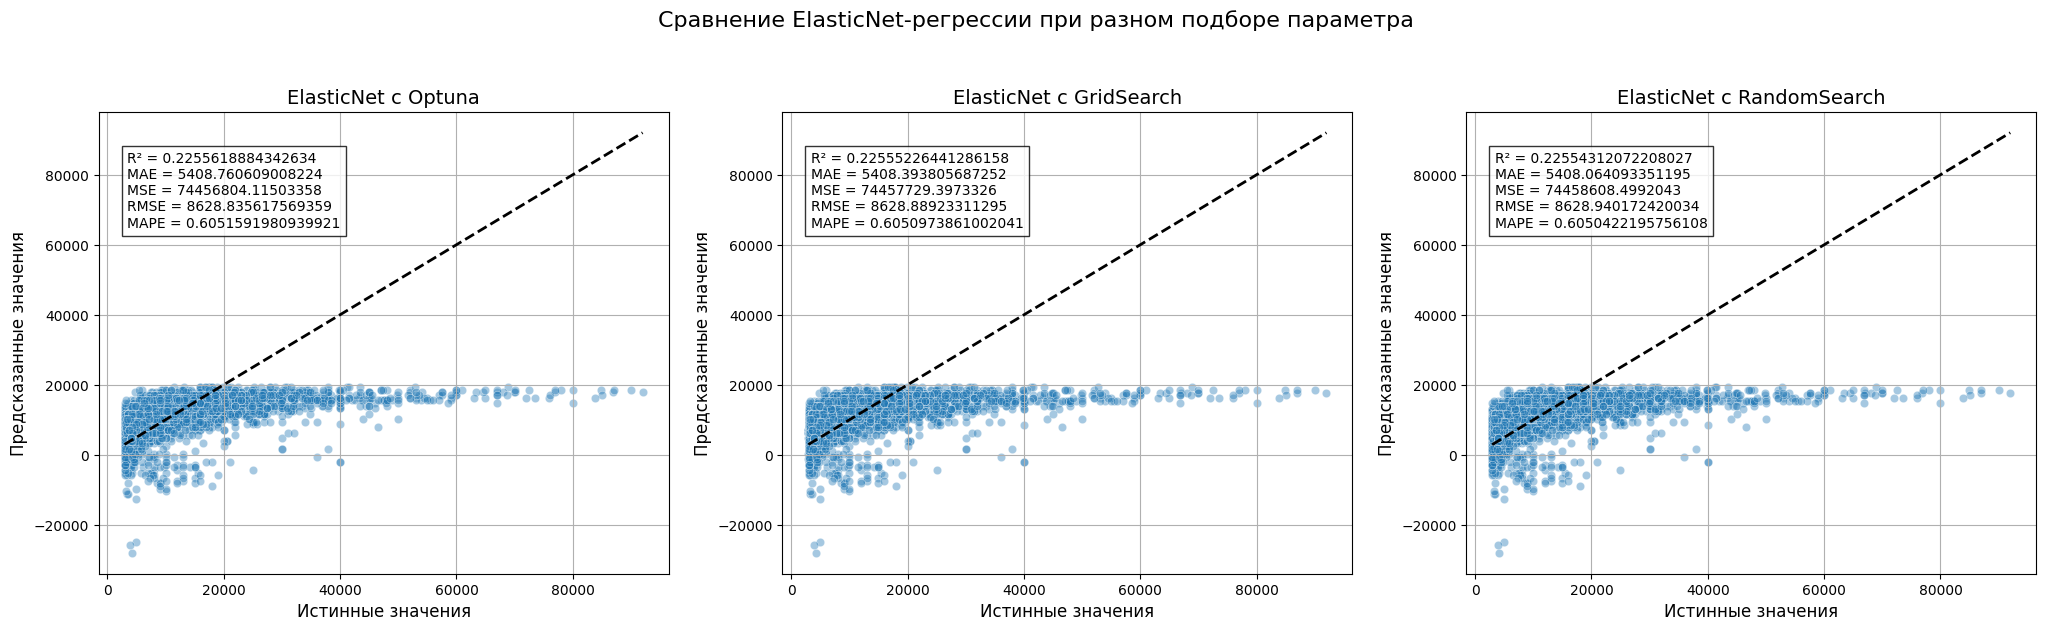

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
plt.suptitle("Сравнение ElasticNet-регрессии при разном подборе параметра", y=1.05, fontsize=16)

# Список моделей и их названий
models = [
    (elastic_best_modelLRS, "ElasticNet с Optuna"),
    (elastic_grid_searchLRS.best_estimator_, "ElasticNet с GridSearch"),
    (elastic_random_searchLRS.best_estimator_, "ElasticNet с RandomSearch")
]

for ax, (model, title) in zip(axes, models):
    # Получаем предсказания
    y_pred = model.predict(X_simple_test)
    
    # Рассчитываем метрики
    r2 = r2_score(y_simple_test, y_pred)
    mae = mean_absolute_error(y_simple_test, y_pred)
    mse = mean_squared_error(y_simple_test, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_simple_test, y_pred)
    
    # Scatter plot
    sns.scatterplot(x=y_simple_test, y=y_pred, alpha=0.4, ax=ax)
    ax.plot([y_simple_test.min(), y_simple_test.max()], 
            [y_simple_test.min(), y_simple_test.max()], 
            'k--', 
            lw=2)
    
    # Текст с метриками
    stats_text = (f'R² = {r2}\n'
                  f'MAE = {mae}\n'
                  f'MSE = {mse}\n'
                  f'RMSE = {rmse}\n'
                  f'MAPE = {mape}')
    
    ax.text(0.05, 0.75, stats_text, 
            transform=ax.transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Оформление
    ax.set_xlabel('Истинные значения', fontsize=12)
    ax.set_ylabel('Предсказанные значения', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True)

plt.show()

# Множественная линейная регрессия

In [31]:
y = data["Price(euro)"]
X = data.drop(["Price(euro)"], axis=1)
selected_features = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission']
X = data[selected_features]

In [32]:
X_multiple_train, X_multiple_test, y_multiple_train, y_multiple_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
scaler.fit(X_multiple_train)
X_multiple_train = scaler.transform(X_multiple_train)
X_multiple_test = scaler.transform(X_multiple_test)

In [34]:
lr_multiple = LinearRegression().fit(X_multiple_train, y_multiple_train)
y_pred_multiple = lr_multiple.predict(X_multiple_test)
y_pred_multiple

array([15947.06078494, 10254.94054095, 19048.45985163, ...,
       21442.1997206 , 13113.5740759 ,  5878.13389571])

In [35]:
lr_multiple.coef_

array([ 4610.55513574, -1084.43129283,  4161.69090624,  1022.45702123])

In [36]:
lr_multiple.intercept_

np.float64(11048.846975400471)

### Метрики качества

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
print(f'MAE: {mean_absolute_error(y_multiple_test, y_pred_multiple)}')
print(f'MSE: {mean_squared_error(y_multiple_test, y_pred_multiple)}')
print(f'RMSE: {sqrt(mean_squared_error(y_multiple_test, y_pred_multiple))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_multiple_test, y_pred_multiple))}')
print(f'R²: {lr_multiple.score(X_multiple_test, y_multiple_test)}')

MAE: 4112.281049778572
MSE: 51526863.47206684
RMSE: 7178.221469978956
MAPE: 0.6757785145277042
R²: 0.4640601713100404


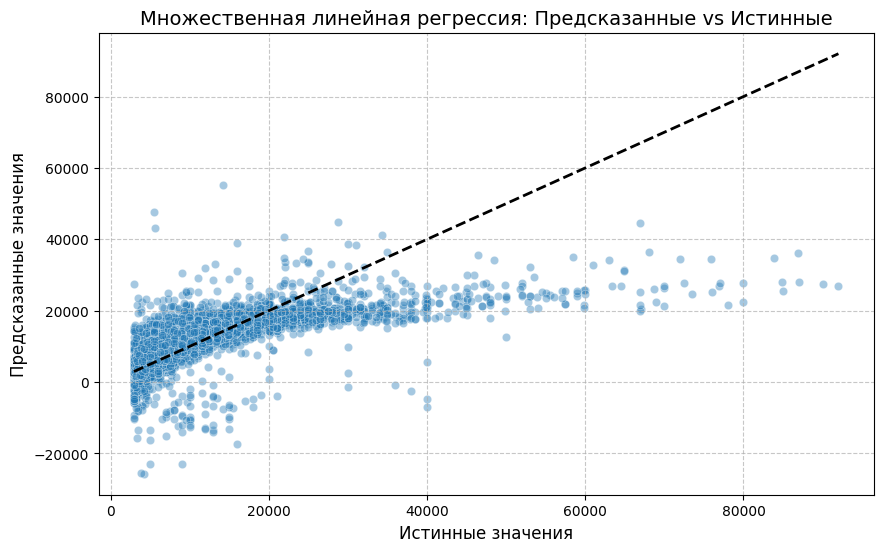

In [38]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=y_multiple_test, y=y_pred_multiple, alpha=0.4)

# Линия идеального предсказания (y = x)
plt.plot([y_multiple_test.min(), y_multiple_test.max()], 
         [y_multiple_test.min(), y_multiple_test.max()], 
         'k--', 
         linewidth=2)

# Настройки оформления
plt.xlabel('Истинные значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Множественная линейная регрессия: Предсказанные vs Истинные', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Регуляризация Lasso (L1) + подбор гиперпараметра alfa

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform

In [40]:
import optuna

In [41]:
# Функция для оптимизации гиперпараметров
def objective(trial):
    # Определяем гиперпараметры
    alpha = trial.suggest_float('alpha', 1e-5, 1e2, log=True)
    model = Lasso(alpha=alpha)

    # Обучаем модель
    model.fit(X_multiple_train, y_multiple_train)

    # Предсказываем
    y_pred = model.predict(X_multiple_test)

    # Вычисляем ошибку
    mse = mean_squared_error(y_multiple_test, y_pred)
    return mse  # Возвращаем MSE для минимизации

In [42]:
# Настраиваем оптимизацию гиперпараметров
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Выводим лучшие гиперпараметры
best_params = study.best_params
lasso_best_modelLRM = Lasso(alpha=best_params['alpha'])
lasso_best_modelLRM.fit(X_multiple_train, y_multiple_train)

# Делаем предсказания на тестовом наборе
y_pred = lasso_best_modelLRM.predict(X_multiple_test)

[I 2025-04-27 17:12:14,155] A new study created in memory with name: no-name-d3b03c3e-2182-4826-b85c-27d7f3c08dba
[I 2025-04-27 17:12:14,207] Trial 0 finished with value: 51526642.84192724 and parameters: {'alpha': 1.2511404918299867}. Best is trial 0 with value: 51526642.84192724.
[I 2025-04-27 17:12:14,225] Trial 1 finished with value: 51526863.47409735 and parameters: {'alpha': 2.2242807451715704e-05}. Best is trial 0 with value: 51526642.84192724.
[I 2025-04-27 17:12:14,245] Trial 2 finished with value: 51523720.03634986 and parameters: {'alpha': 25.255419678896182}. Best is trial 2 with value: 51523720.03634986.
[I 2025-04-27 17:12:14,259] Trial 3 finished with value: 51526878.11307673 and parameters: {'alpha': 0.07608575016849048}. Best is trial 2 with value: 51523720.03634986.
[I 2025-04-27 17:12:14,286] Trial 4 finished with value: 51526705.47194603 and parameters: {'alpha': 0.9341032493474566}. Best is trial 2 with value: 51523720.03634986.
[I 2025-04-27 17:12:14,289] Trial 6 

In [43]:
# Создаем модель Lasso
lasso_model = Lasso(max_iter=1000, tol=0.01)

In [44]:
# Задаем сетку параметров для перебора
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Инициализируем GridSearch
lasso_grid_searchLRM = GridSearchCV(lasso_model, 
                          param_grid, 
                          scoring='neg_mean_squared_error', 
                          cv=3, 
                          verbose=1,
                          n_jobs=-1)

In [45]:
# Обучаем модель с перебором параметров
lasso_grid_searchLRM.fit(X_multiple_train, y_multiple_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=Lasso(tol=0.01), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [46]:
# RandomizedSearchCV для L1 регуляризации
# Задаем распределение параметров
param_dist = {'alpha': loguniform(1e-3, 100)}

# Инициализируем RandomizedSearch
lasso_random_searchLRM = RandomizedSearchCV(lasso_model, 
                                  param_dist, 
                                  n_iter=20, 
                                  cv=3, 
                                  scoring='neg_mean_squared_error', 
                                  random_state=42, 
                                  verbose=1,
                                  n_jobs=-1)

In [47]:
# Обучаем модель
lasso_random_searchLRM.fit(X_multiple_train, y_multiple_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=Lasso(tol=0.01), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C0EEB5F1F0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

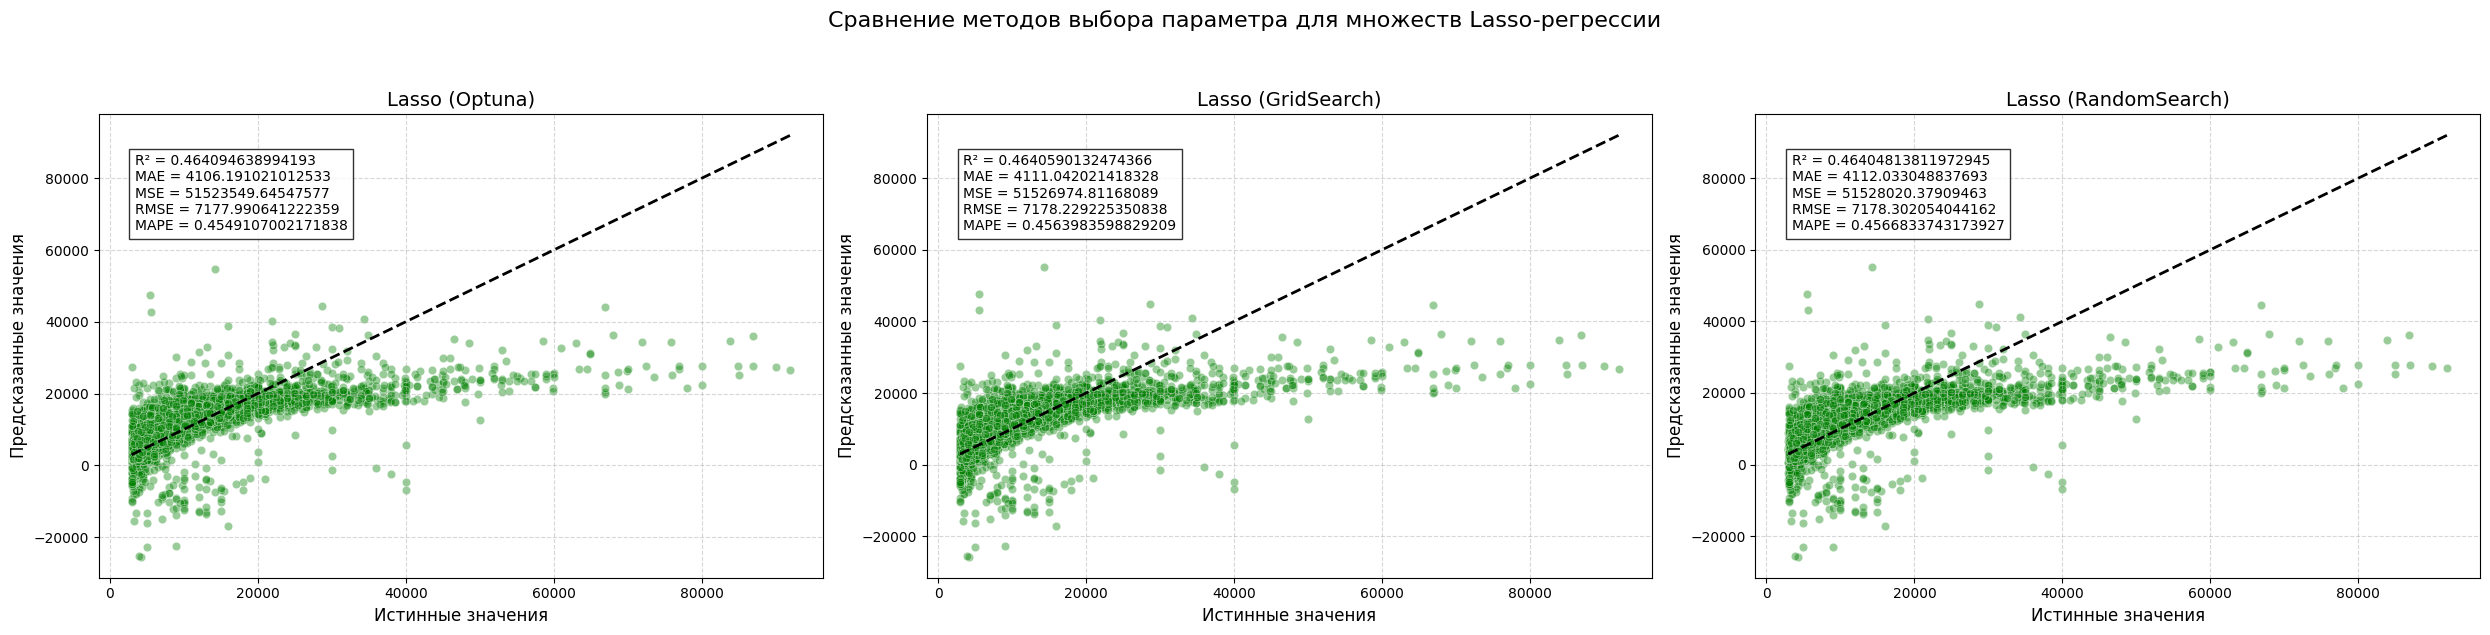

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
plt.suptitle("Сравнение методов выбора параметра для множеств Lasso-регрессии", y=1.05, fontsize=16)

models = [
    (lasso_best_modelLRM, "Lasso (Optuna)"),
    (lasso_grid_searchLRM.best_estimator_, "Lasso (GridSearch)"),
    (lasso_random_searchLRM.best_estimator_, "Lasso (RandomSearch)")
]

for ax, (model, title) in zip(axes, models):
    # Получаем предсказания
    y_pred = model.predict(X_multiple_test)
    
    # Рассчитываем метрики
    r2 = r2_score(y_multiple_test, y_pred)
    mae = mean_absolute_error(y_multiple_test, y_pred)
    mse = mean_squared_error(y_multiple_test, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_multiple_test, y_pred)
    
    # Scatter plot
    sns.scatterplot(x=y_multiple_test, y=y_pred, alpha=0.4, ax=ax, color='green')
    ax.plot([y_multiple_test.min(), y_multiple_test.max()], 
            [y_multiple_test.min(), y_multiple_test.max()], 
            'k--', 
            lw=2)
    
    # Текст с метриками
    stats_text = (f'R² = {r2}\n'
                  f'MAE = {mae}\n'
                  f'MSE = {mse}\n'
                  f'RMSE = {rmse}\n'
                  f'MAPE = {mape}')
    
    ax.text(0.05, 0.75, stats_text, 
            transform=ax.transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Оформление
    ax.set_xlabel('Истинные значения', fontsize=12)
    ax.set_ylabel('Предсказанные значения', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Регуляризация Ridge (L2) + подбор гиперпараметра alfa

In [49]:
from sklearn.linear_model import Ridge

In [50]:
# Функция для оптимизации гиперпараметров
def objective(trial):
    # Определяем гиперпараметры
    alpha = trial.suggest_float('alpha', 1e-5, 1e2, log=True)
    model = Ridge(alpha=alpha)

    # Обучаем модель
    model.fit(X_multiple_train, y_multiple_train)

    # Предсказываем
    y_pred = model.predict(X_multiple_test)

    # Вычисляем ошибку
    mse = mean_squared_error(y_multiple_test, y_pred)
    return mse  # Возвращаем MSE для минимизации

In [51]:
# Настраиваем оптимизацию гиперпараметров
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Выводим лучшие гиперпараметры
best_params = study.best_params
ridge_best_modelLRM = Ridge(alpha=best_params['alpha'])
ridge_best_modelLRM.fit(X_multiple_train, y_multiple_train)

# Делаем предсказания на тестовом наборе
y_pred = ridge_best_modelLRM.predict(X_multiple_test)

[I 2025-04-27 17:12:17,517] A new study created in memory with name: no-name-e0146638-d2bf-4864-b36e-d8fb84d9e614
[I 2025-04-27 17:12:17,566] Trial 0 finished with value: 51525115.42839078 and parameters: {'alpha': 51.0459584493662}. Best is trial 0 with value: 51525115.42839078.
[I 2025-04-27 17:12:17,578] Trial 1 finished with value: 51526820.05851967 and parameters: {'alpha': 1.0823301004472698}. Best is trial 0 with value: 51525115.42839078.
[I 2025-04-27 17:12:17,601] Trial 2 finished with value: 51526863.47160565 and parameters: {'alpha': 1.1461324177304108e-05}. Best is trial 0 with value: 51525115.42839078.
[I 2025-04-27 17:12:17,602] Trial 3 finished with value: 51526740.01854664 and parameters: {'alpha': 3.096181611291938}. Best is trial 0 with value: 51525115.42839078.
[I 2025-04-27 17:12:17,710] Trial 4 finished with value: 51525395.933904335 and parameters: {'alpha': 41.506136253027385}. Best is trial 0 with value: 51525115.42839078.
[I 2025-04-27 17:12:17,713] Trial 5 fin

In [52]:
# Создаем модель Ridge 
ridge_model = Ridge(max_iter=1000, tol=0.01)

In [53]:
# Параметры для GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

ridge_grid_searchLRM = GridSearchCV(
    ridge_model,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,        
    n_jobs=-1,
    verbose=1
)

In [54]:
ridge_grid_searchLRM.fit(X_multiple_train, y_multiple_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=Ridge(max_iter=1000, tol=0.01), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

In [55]:
# Параметры для RandomizedSearchCV
param_dist = {'alpha': loguniform(1e-3, 1000)} 

ridge_random_searchLRM = RandomizedSearchCV(
    ridge_model,
    param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [56]:
ridge_random_searchLRM.fit(X_multiple_train, y_multiple_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=Ridge(max_iter=1000, tol=0.01), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C0EC807DF0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

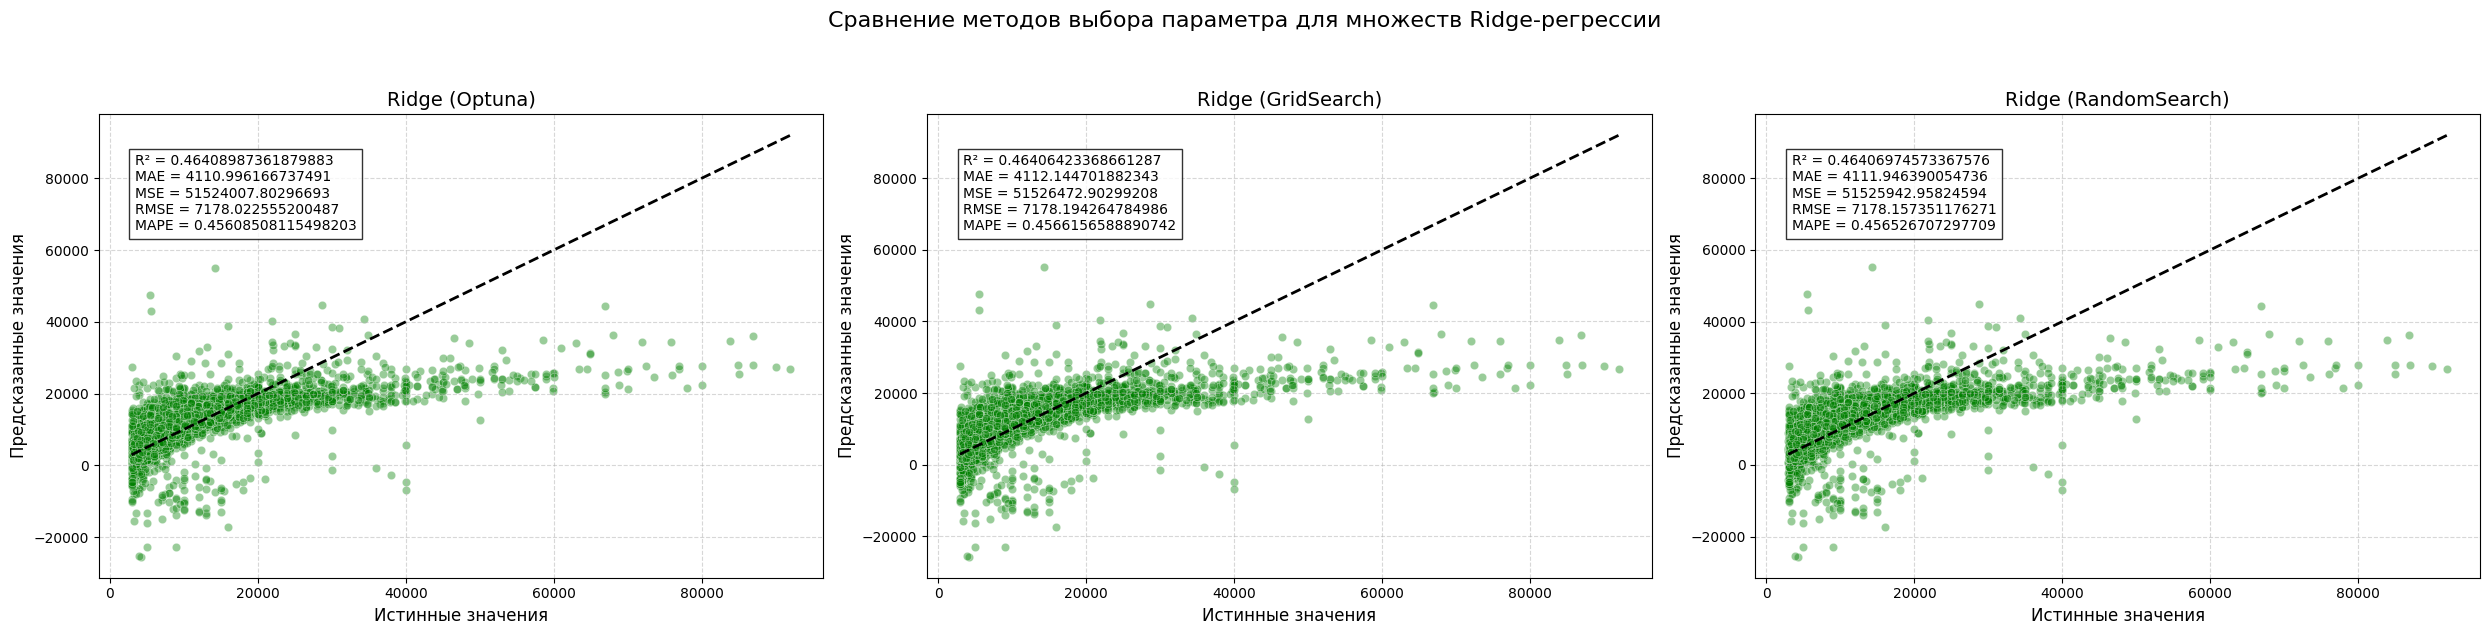

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
plt.suptitle("Сравнение методов выбора параметра для множеств Ridge-регрессии", y=1.05, fontsize=16)

models = [
    (ridge_best_modelLRM, "Ridge (Optuna)"),
    (ridge_grid_searchLRM.best_estimator_, "Ridge (GridSearch)"),
    (ridge_random_searchLRM.best_estimator_, "Ridge (RandomSearch)")
]

for ax, (model, title) in zip(axes, models):
    # Получаем предсказания
    y_pred = model.predict(X_multiple_test)
    
    # Рассчитываем метрики
    r2 = r2_score(y_multiple_test, y_pred)
    mae = mean_absolute_error(y_multiple_test, y_pred)
    mse = mean_squared_error(y_multiple_test, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_multiple_test, y_pred)
    
    # Scatter plot
    sns.scatterplot(x=y_multiple_test, y=y_pred, alpha=0.4, ax=ax, color='green')
    ax.plot([y_multiple_test.min(), y_multiple_test.max()], 
            [y_multiple_test.min(), y_multiple_test.max()], 
            'k--', 
            lw=2)
    
    # Текст с метриками
    stats_text = (f'R² = {r2}\n'
                  f'MAE = {mae}\n'
                  f'MSE = {mse}\n'
                  f'RMSE = {rmse}\n'
                  f'MAPE = {mape}')
    
    ax.text(0.05, 0.75, stats_text, 
            transform=ax.transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Оформление
    ax.set_xlabel('Истинные значения', fontsize=12)
    ax.set_ylabel('Предсказанные значения', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Регуляризация Elastic Net + подбор гиперпараметра alfa и l1_ratio

In [58]:
from sklearn.linear_model import ElasticNet

In [59]:
# Функция для оптимизации гиперпараметров
def objective(trial):
    # Определяем гиперпараметры
    alpha = trial.suggest_float('alpha', 1e-5, 1e2, log=True)
    model = ElasticNet(alpha=alpha)

    # Обучаем модель
    model.fit(X_multiple_train, y_multiple_train)

    # Предсказываем
    y_pred = model.predict(X_multiple_test)

    # Вычисляем ошибку
    mse = mean_squared_error(y_multiple_test, y_pred)
    return mse  # Возвращаем MSE для минимизации

In [60]:
# Настраиваем оптимизацию гиперпараметров
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Выводим лучшие гиперпараметры
best_params = study.best_params
elastic_best_modelLRM = ElasticNet(alpha=best_params['alpha'])
elastic_best_modelLRM.fit(X_multiple_train, y_multiple_train)

# Делаем предсказания на тестовом наборе
y_pred = elastic_best_modelLRM.predict(X_multiple_test)

[I 2025-04-27 17:12:20,500] A new study created in memory with name: no-name-e5940da5-de5a-4044-9005-48401a79252a
[I 2025-04-27 17:12:20,551] Trial 0 finished with value: 65068505.765347116 and parameters: {'alpha': 2.977309738646554}. Best is trial 0 with value: 65068505.765347116.
[I 2025-04-27 17:12:20,565] Trial 1 finished with value: 58443600.284343354 and parameters: {'alpha': 1.4866779166066393}. Best is trial 1 with value: 58443600.284343354.
[I 2025-04-27 17:12:20,576] Trial 3 finished with value: 91454285.18332198 and parameters: {'alpha': 45.898379949510954}. Best is trial 1 with value: 58443600.284343354.
[I 2025-04-27 17:12:20,577] Trial 2 finished with value: 51525583.70045916 and parameters: {'alpha': 0.003107127633424479}. Best is trial 2 with value: 51525583.70045916.
[I 2025-04-27 17:12:20,597] Trial 4 finished with value: 51526789.32879102 and parameters: {'alpha': 0.0001621914437664086}. Best is trial 2 with value: 51525583.70045916.
[I 2025-04-27 17:12:20,604] Tria

In [61]:
# Создаем модель
elastic_model = ElasticNet(max_iter=1000, tol=0.01)

In [62]:
# Параметры для GridSearchCV
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}
elastic_grid_searchLRM = GridSearchCV(
    elastic_model,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [63]:
elastic_grid_searchLRM.fit(X_multiple_train, y_multiple_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=ElasticNet(tol=0.01), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.75, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [64]:
# Параметры для RandomizedSearchCV
param_dist = {
    'alpha': loguniform(1e-3, 100),
    'l1_ratio': [0.1,0.75,0.99,1]
}

elastic_random_searchLRM = RandomizedSearchCV(
    elastic_model,
    param_dist,
    n_iter=30,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [65]:
elastic_random_searchLRM.fit(X_multiple_train, y_multiple_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=ElasticNet(tol=0.01), n_iter=30, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C0EC68FFA0>,
                                        'l1_ratio': [0.1, 0.75, 0.99, 1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

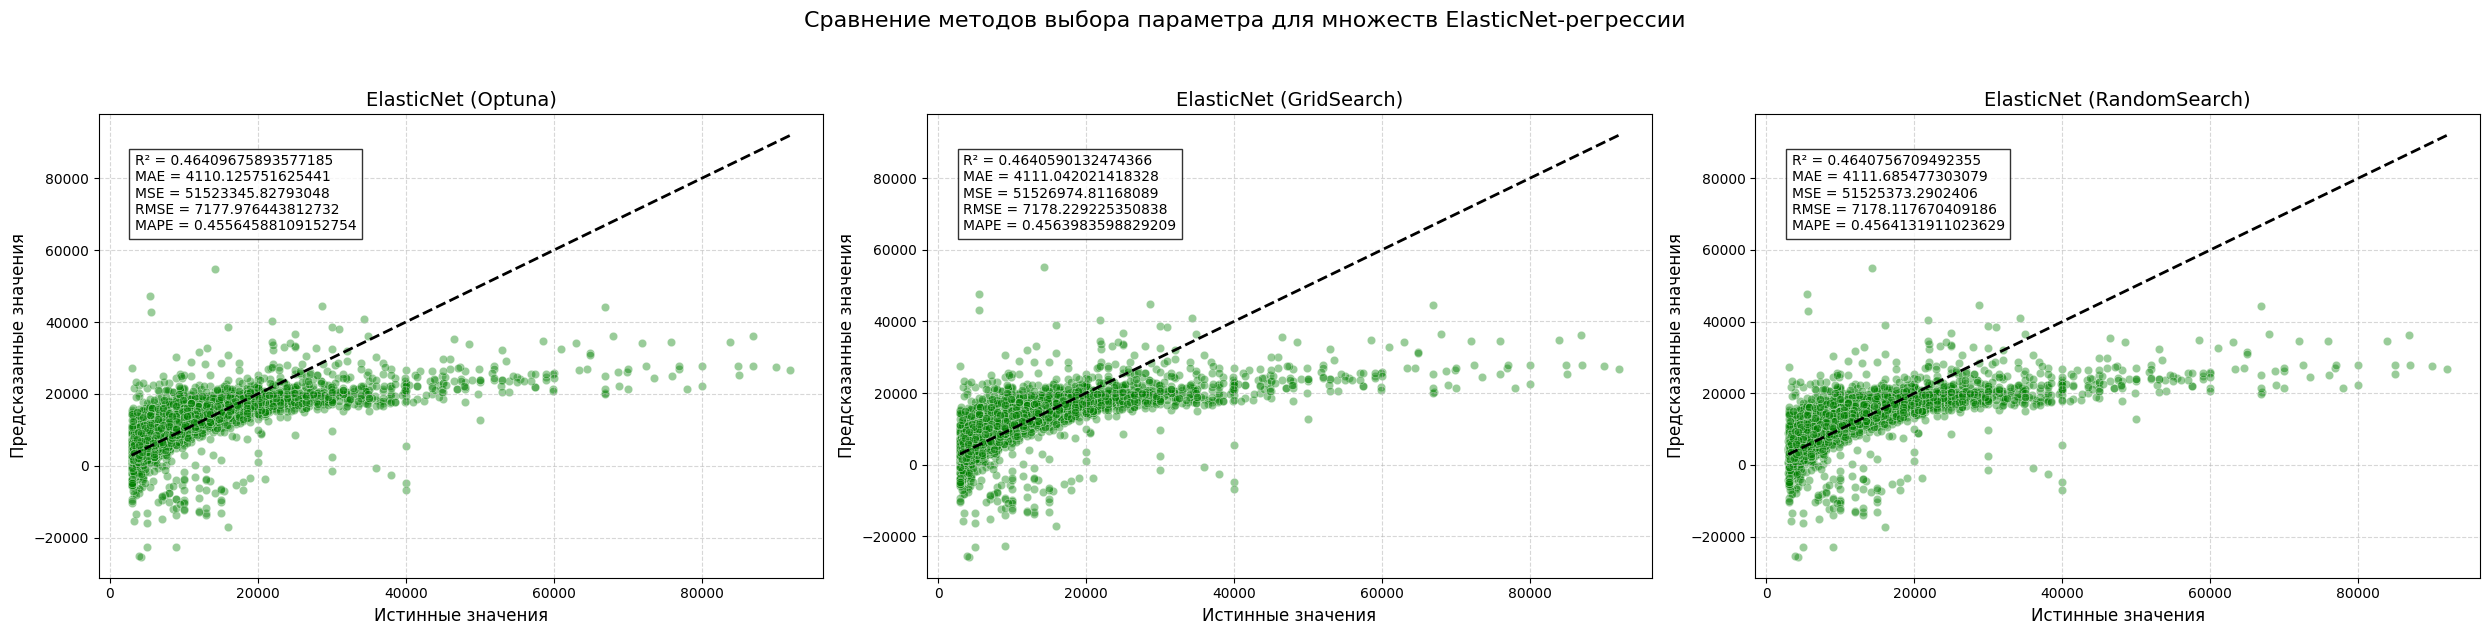

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
plt.suptitle("Сравнение методов выбора параметра для множеств ElasticNet-регрессии", y=1.05, fontsize=16)

models = [
    (elastic_best_modelLRM, "ElasticNet (Optuna)"),
    (elastic_grid_searchLRM.best_estimator_, "ElasticNet (GridSearch)"),
    (elastic_random_searchLRM.best_estimator_, "ElasticNet (RandomSearch)")
]

for ax, (model, title) in zip(axes, models):
    # Получаем предсказания
    y_pred = model.predict(X_multiple_test)
    
    # Рассчитываем метрики
    r2 = r2_score(y_multiple_test, y_pred)
    mae = mean_absolute_error(y_multiple_test, y_pred)
    mse = mean_squared_error(y_multiple_test, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_multiple_test, y_pred)
    
    # Scatter plot
    sns.scatterplot(x=y_multiple_test, y=y_pred, alpha=0.4, ax=ax, color='green')
    ax.plot([y_multiple_test.min(), y_multiple_test.max()], 
            [y_multiple_test.min(), y_multiple_test.max()], 
            'k--', 
            lw=2)
    
    # Текст с метриками
    stats_text = (f'R² = {r2}\n'
                  f'MAE = {mae}\n'
                  f'MSE = {mse}\n'
                  f'RMSE = {rmse}\n'
                  f'MAPE = {mape}')
    
    ax.text(0.05, 0.75, stats_text, 
            transform=ax.transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Оформление
    ax.set_xlabel('Истинные значения', fontsize=12)
    ax.set_ylabel('Предсказанные значения', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [67]:
models = {
    # Простые модели
    'Пр регрессия': {
        'model': lr_simple,
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },
    'П+Lasso+Optuna': {
        'model': lasso_best_modelLRS,
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },
    'П+Lasso+GridSearch': {
        'model': lasso_grid_searchLRS.best_estimator_, 
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },
    'П+Lasso+RandomSearch': {
        'model': lasso_random_searchLRS.best_estimator_,
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },
    'П+Ridge+Optuna': {
        'model': ridge_best_modelLRS,
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },
    'П+Ridge+GridSearch': {
        'model': ridge_grid_searchLRS.best_estimator_,
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },
    'П+Ridge+RandomSearch': {
        'model': ridge_random_searchLRS.best_estimator_,
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },
    'П+ElasticNet+Optuna': {
        'model': elastic_best_modelLRS,
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },
    'П+ElasticNet+GridSearch': {
        'model': elastic_grid_searchLRS.best_estimator_,
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },
    'П+ElasticNet+RandomSearch': {
        'model': elastic_random_searchLRS.best_estimator_,
        'X_train': X_simple_train,
        'X_test': X_simple_test,
        'y_train': y_simple_train,
        'y_test': y_simple_test
    },

    # Множественные модели
    'М регрессия': {
        'model': lr_multiple,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    },
    'М+Lasso+Optuna': {
        'model': lasso_best_modelLRM,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    },
    'М+Lasso+GridSearch': {
        'model': lasso_grid_searchLRM.best_estimator_,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    },
    'М+Lasso+RandomSearch': {
        'model': lasso_random_searchLRM.best_estimator_,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    },
    'М+Ridge+Optuna': {
        'model': ridge_best_modelLRM,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    },
    'М+Ridge+GridSearch': {
        'model': ridge_grid_searchLRM.best_estimator_,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    },
    'М+Ridge+RandomSearch': {
        'model': ridge_random_searchLRM.best_estimator_,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    },
    'М+ElasticNet+Optuna': {
        'model': elastic_best_modelLRM,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    },
    'М+ElasticNet+GridSearch': {
        'model': elastic_grid_searchLRM.best_estimator_,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    },
    'М+ElasticNet+RandomSearch': {
        'model': elastic_random_searchLRM.best_estimator_,
        'X_train': X_multiple_train,
        'X_test': X_multiple_test,
        'y_train': y_multiple_train,
        'y_test': y_multiple_test
    }
}

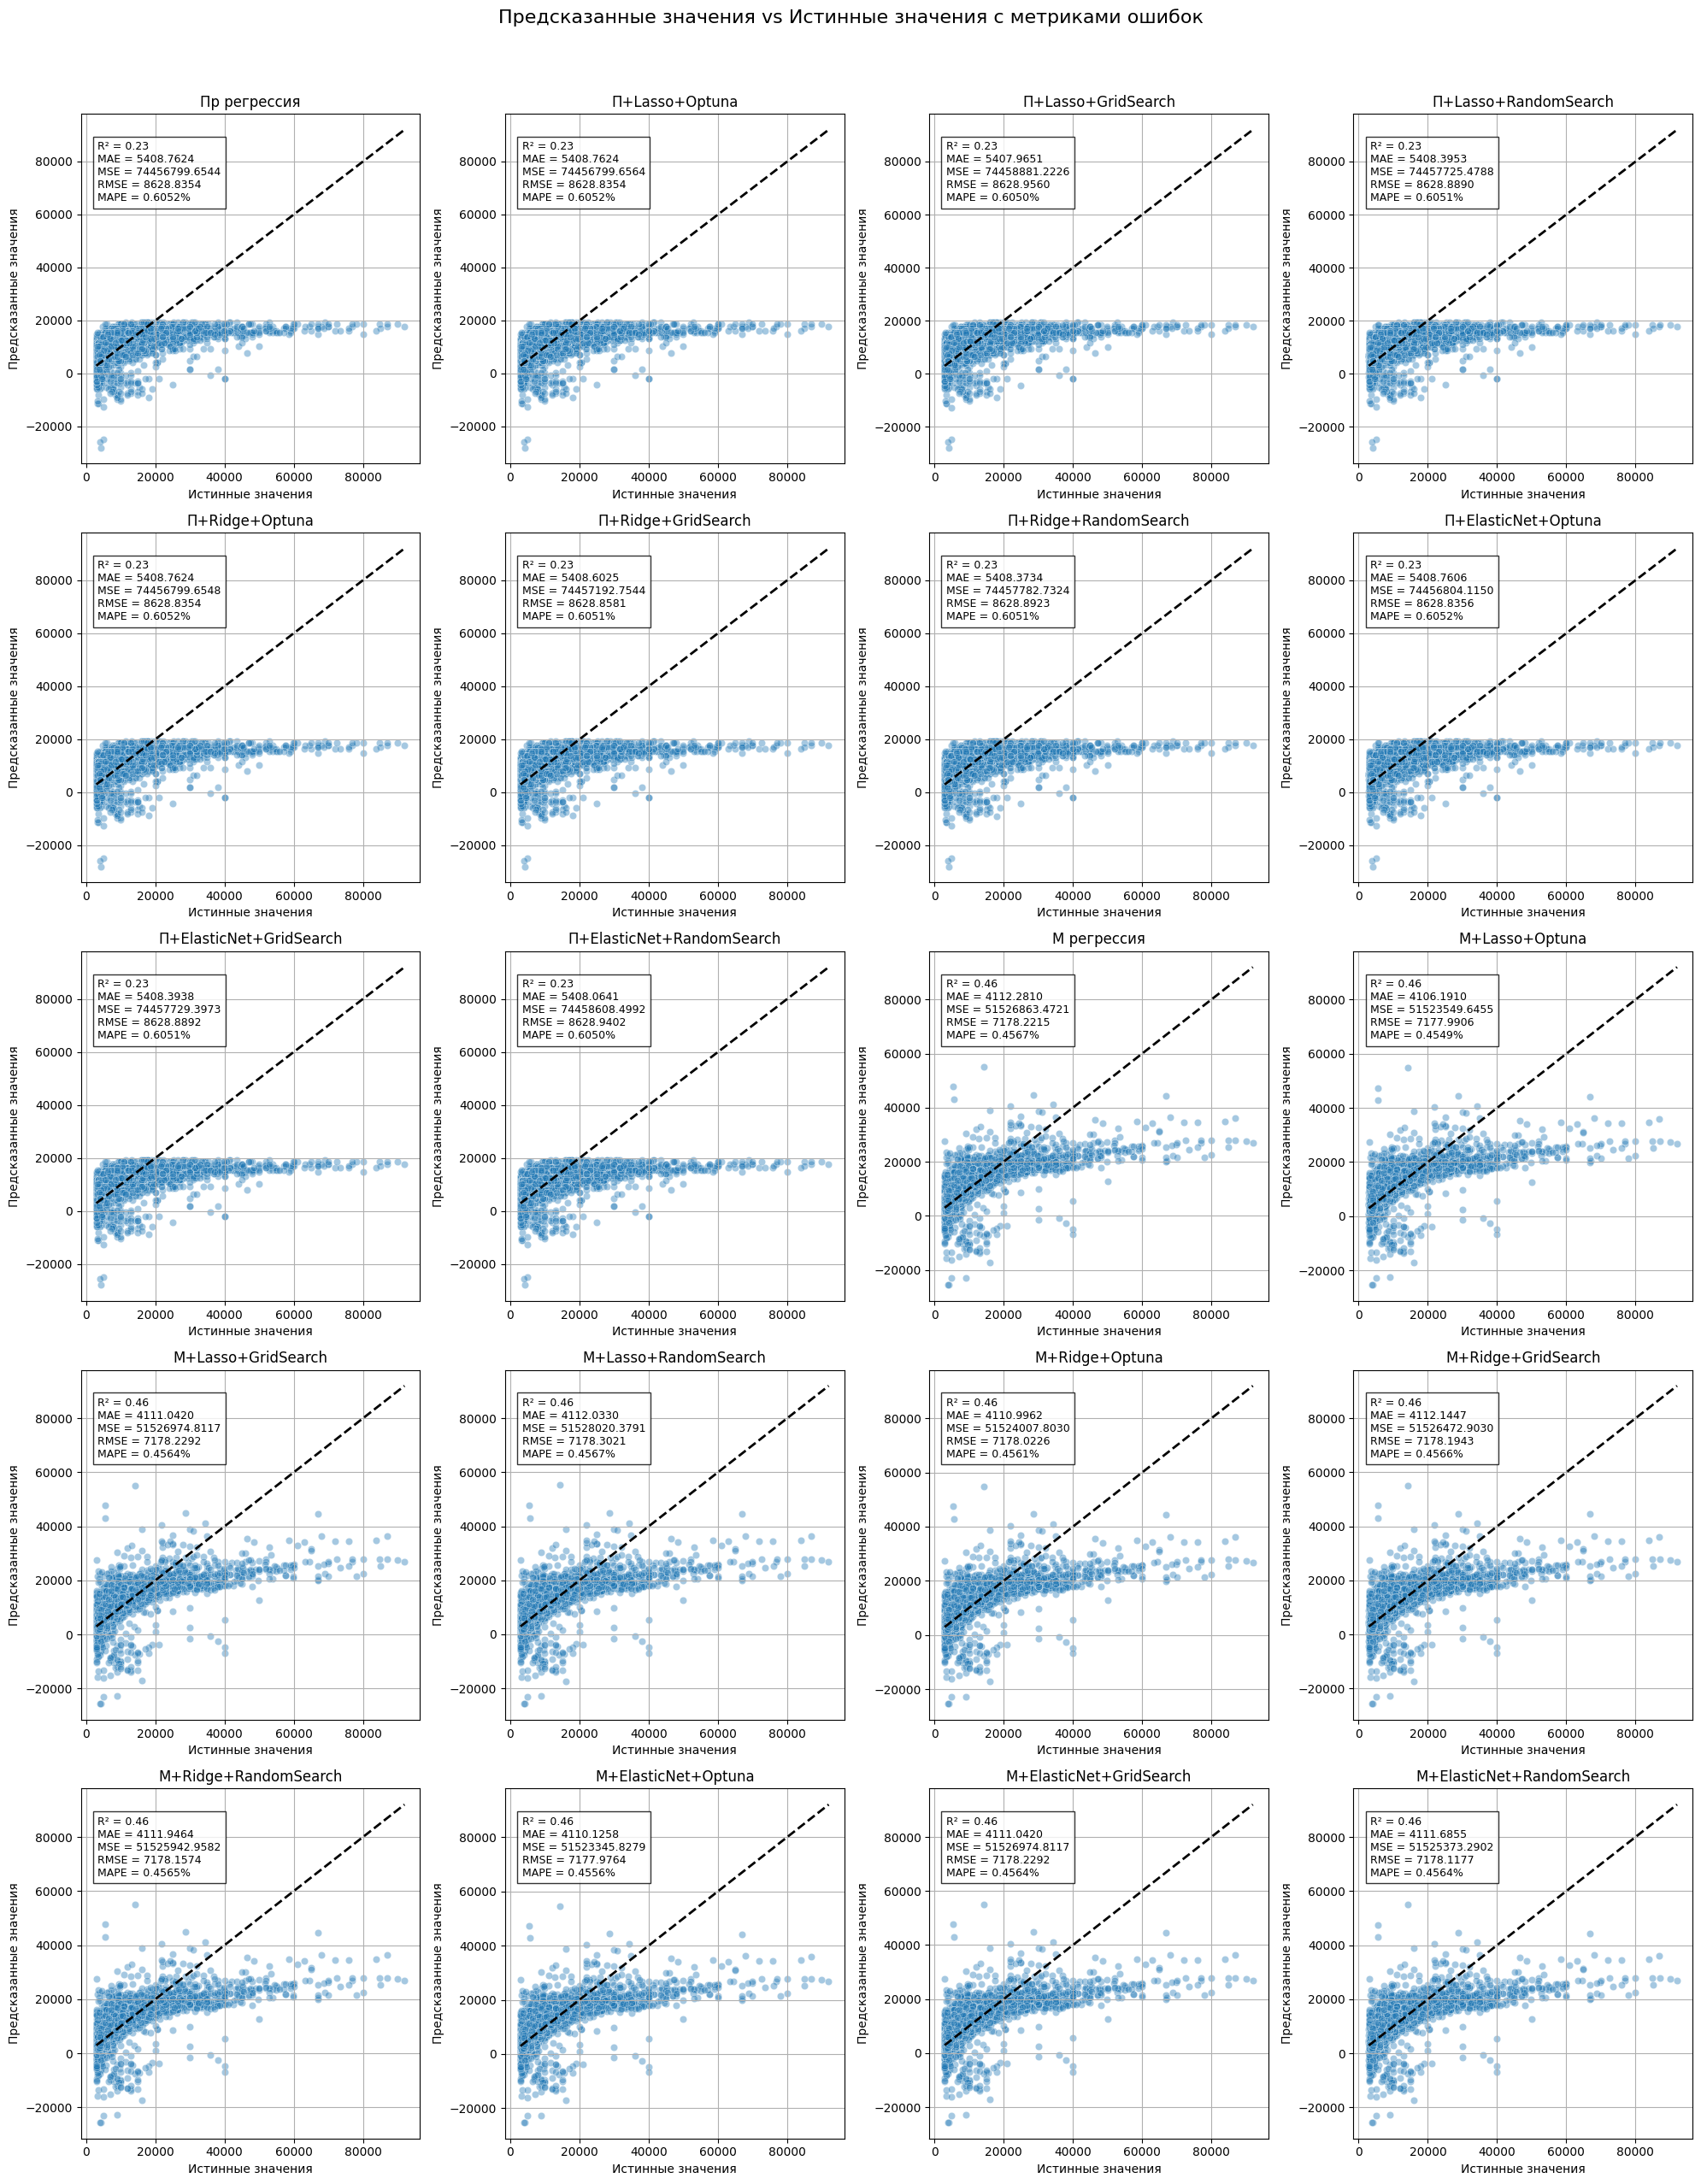

In [68]:
import math
# Размер сетки
n_models = len(models)
n_cols = 4
n_rows = math.ceil(n_models / n_cols)

plt.figure(figsize=(20, 5*n_rows))
plt.suptitle("Предсказанные значения vs Истинные значения с метриками ошибок", y=1.02, fontsize=16)

# Создаем сетку графиков
axes = [plt.subplot(n_rows, n_cols, i+1) for i in range(n_models)]

for ax, (model_name, model_data) in zip(axes, models.items()):
    # Извлекаем модель и данные
    model = model_data['model']
    X_test = model_data['X_test']
    y_test = model_data['y_test']
    
    # Получаем предсказания
    y_pred = model.predict(X_test)
    
    # Рассчитываем метрики
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Строим scatter plot
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, ax=ax)
    ax.plot([y_test.min(), y_test.max()], 
            [y_test.min(), y_test.max()], 
            'k--', lw=2) # это линия идеального предсказания
    
    # аннотация с метриками
    stats_text = (f'R² = {r2:.2f}\n'
                  f'MAE = {mae:.4f}\n'
                  f'MSE = {mse:.4f}\n'
                  f'RMSE = {rmse:.4f}\n'
                  f'MAPE = {mape:.4f}%')
    
    ax.text(0.05, 0.75, stats_text, 
            transform=ax.transAxes,
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Настройки графика
    ax.set_xlabel('Истинные значения')
    ax.set_ylabel('Предсказанные значения')
    ax.set_title(model_name)
    ax.grid(True)


plt.tight_layout()
plt.show()

# Полиномиальная регрессия

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# выбор топ-3 признаков по корреляции
corr_matrix = data.corr()
top_features = corr_matrix["Price(euro)"].abs().sort_values(ascending=False).index[1:4]  # [1:4] так как исключить саму целевую переменную

In [71]:
X_poly = data[top_features]
y = data["Price(euro)"]

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Создаем пайплайн
poly_pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("model", LinearRegression())
])

# Обучение
poly_pipe.fit(X_poly_train, y_poly_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])

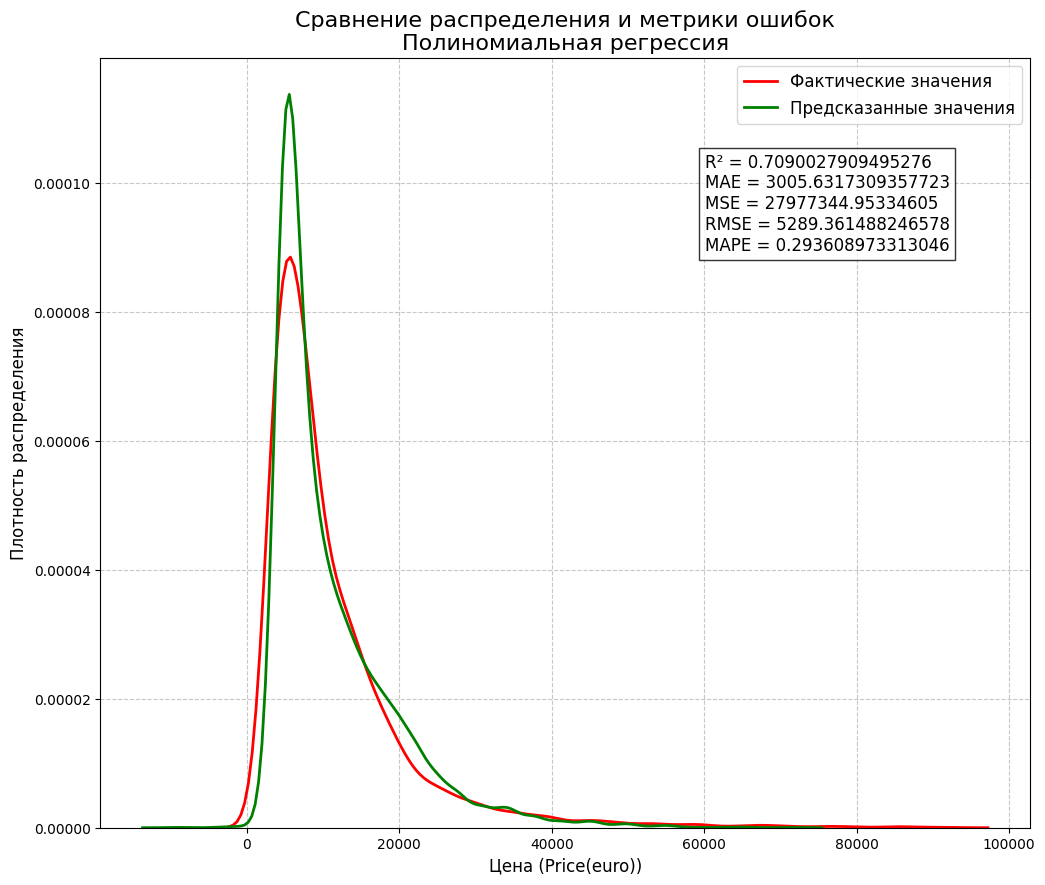

In [73]:
# Получаем предсказания модели
y_pred = poly_pipe.predict(X_poly_test)

# Рассчитываем метрики
r2 = r2_score(y_poly_test, y_pred)
mae = mean_absolute_error(y_poly_test, y_pred)
mse = mean_squared_error(y_poly_test, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_poly_test, y_pred) 

plt.figure(figsize=(12, 10))

# KDE для фактических значений
sns.kdeplot(
    y_poly_test, 
    color='red', 
    label='Фактические значения', 
    linewidth=2
)

# KDE для предсказанных значений
sns.kdeplot(
    y_pred, 
    color='green', 
    label='Предсказанные значения', 
    linewidth=2
)

# Добавляем метрики
stats_text = (f'R² = {r2}\n'
              f'MAE = {mae}\n'
              f'MSE = {mse}\n'
              f'RMSE = {rmse}\n'
              f'MAPE = {mape}')

plt.text(0.65, 0.75, stats_text, 
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

# Настройки оформления
plt.title('Сравнение распределения и метрики ошибок\nПолиномиальная регрессия', fontsize=16)
plt.xlabel('Цена (Price(euro))', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [75]:
%run lab2_custom_metrics.ipynb


# Выводы по результатам моделей

### **Интерпретация метрик**:
1. **R² (коэффициент детерминации)**:  
   - Показывает, какую долю дисперсии целевой переменной объясняет модель. Если R2 приближается к 1, это указывает на высокую степень соответствия данных модели, в то время как низкие значения говорят о том, что модель плохо объясняет зависимости.  
   - Пример: R² = 0.71 → модель объясняет 71% изменчивости цены.  

2. **MAE (средняя абсолютная ошибка)**:  
   - Среднее отклонение предсказаний от истинных значений.  
   - Пример: MAE = 3005.63 → в среднем модель ошибается на ±3005 евро.  

3. **RMSE (среднеквадратическая ошибка)**:  
   - Учитывает большие ошибки сильнее, чем MAE.  
   - Пример: RMSE = 5289.36 → крупные ошибки редки, но возможны.  

4. **MAPE (средняя абсолютная процентная ошибка)**:  
   - Ошибка в процентах от истинных значений.  
   - Пример: MAPE = 0.2936% → модель ошибается в среднем на 29%.  


### **Лучшая модель: Полиномиальная регрессия**
Наивысшее качество на тестовых данных:  
- **R² = 0.71** (объясняет 71% дисперсии данных).  
- **MAPE = 0.2936%** (средняя ошибка прогноза — менее 0.3%).  
- **RMSE = 5289.36** и **MAE = 3005.63** — самые низкие ошибки среди всех моделей.  

### **Худшие модели: Простые регрессии (Lasso/Ridge/ElasticNet)**
Низкое качество прогноза:  
- **R² ≈ 0.23** (объясняет только 23% дисперсии).  
- **MAPE ≈ 0.6%** (ошибка в 2 раза выше, чем у полиномиальной модели).  
- **RMSE ≈ 8600** — в 1.6 раза хуже полиномиальной модели.  
- Регуляризация (Lasso/Ridge/ElasticNet) **не улучшила** результаты:  
- Метрики практически идентичны базовой простой регрессии.  

### **Множественные регрессии (с регуляризацией)**
- Средние результаты:  
- **R² ≈ 0.46** — лучше простых моделей, но хуже полиномиальной.  
- **MAPE ≈ 0.455%** — ошибка выше, чем у полиномиальной модели, но ниже, чем у простых.  
- Регуляризация дала незначительный эффект:  
- Например, Lasso+Optuna: **MAE = 4106.49** vs базовая множественная регрессия: **MAE = 4112.28**.  

# Реализация линейной регресии (на основе градиентного спуска)

In [83]:
%run lab2_custom_regression.ipynb

In [84]:
data = pd.read_csv(r'C:\Users\Zver\Desktop\ML\data\moldova_cars_task_filtered_ohe.csv', sep=',', encoding='utf-8')
X = data.drop('Price(euro)', axis=1)
y = data['Price(euro)']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели
weights, bias = linear_regression(X_train_scaled, y_train, learning_rate=0.01, n_iters=2000)

y_pred = predict(X_test_scaled, weights, bias)

y_pred

array([15801.27461799, 11184.16530319, 19665.61770397, ...,
       40951.12346421,  8629.47933151,  5867.68540702])

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from math import sqrt
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(r2, mae, mse, rmse, mape)

0.6825034287317899 3066.2039549109063 30525073.160872333 5524.950059581745 0.3479617047739891


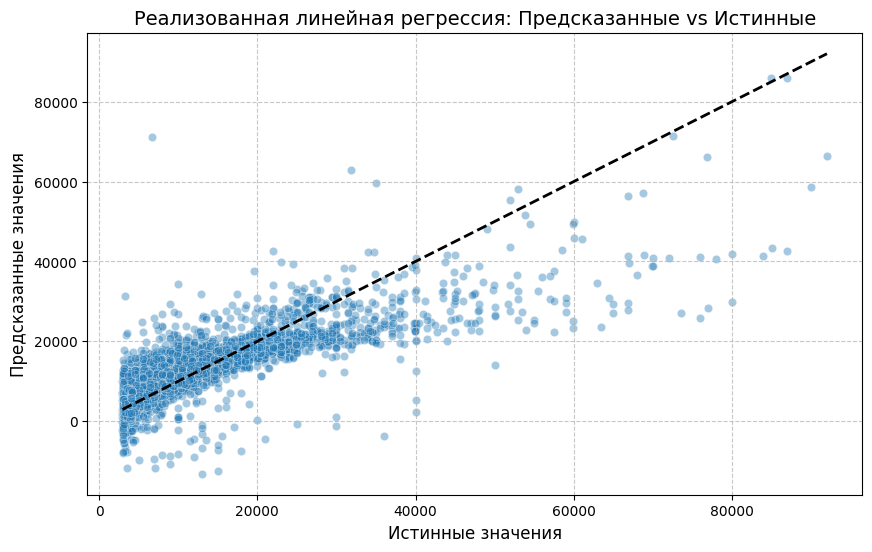

In [87]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)

# Линия идеального предсказания (y = x)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'k--', 
         linewidth=2)

plt.xlabel('Истинные значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Реализованная линейная регрессия: Предсказанные vs Истинные', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()